In machine learning problems, some datasets can contain millions of features. This great amount of features can make training algorithms very slow and make the process of finding a solution much harder. This problem can be solved by using what it called Dimensionality Reduction. 

The objective of dimensionality reduction is to reduce the number of features losing the least amount of information from the original dataset. Besides from speeding up training, dimensionality reduction also allows to visualize a high-dimensional training data in one, two, or three dimensions.

It has to be noted that, although dimensionality reduction speeds up training, generally models perform worse when the dimensions of the datasets are reduced because some information is lost. This is why it is better to try training the algorithm without using dimensionality reduction. There are some cases in which the dimensionalilty reduction filters noise and unnecessary details from the datasets, but this is generally not the case. 

# The Curse of Dimensionality

Intuition fails when dealing with higher dimension. For example, points tend to be farther apart in higher dimensions than in lower dimensions. This fact, for example, makes that instances in a high dimensional dataset are farther apart than in lower dimensions. This means that it is likely that a new instance will be far away from the initial training instances. This greater distance makes predictions difficult in high-dimensional dataset, because predictions will be based in larger extrapolations. Larger extrapolations make models more prone to overfitting.

A naïve solution to the dimensionality problem would be gathering more training instances to increase the instance density. This approach is not feasible, because the number of training instances required to achieve a given instance density grows exponentially with dimensions.

# Main Approaches for Dimensionality Reduction

## Projection

In many real-world problems, training instances are not spread out uniformly in all the dimensions of the datasets. Instead, many features are highly correlated, so instances lie close to a lower dimensional subspace of the dataset. For example, a highly correlated instance in a 3D dataset would have all instances near a plane. The idea behind the projection method is to project all the instances into that subspace, the plane in the example, an have a datasets with fewer dimensions. Since the new instances are projections of the original instances, new features are created while performing the projection into the subspace. 

## Manifold Learning

Sometimes projecting the instances into a hyper-plane is not a good idea, since different layers of the data can be placed together in the lower dimension, while in the original space they are far apart. An example of this kind of dataset is the Swiss Roll

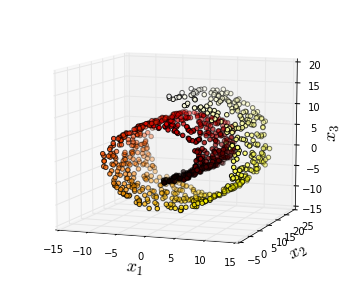

In [1]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

The Swiss Roll is an example of a 2D manifold: a 2D shape that can be bent and twisted in a higher dimensional space. The 2D manifold resembles a 2D plane but rolled in the third dimension. This manifold concept can be generalized to higher dimensions. 

Manifold Learning works under the assumptions that high-dimensional datasets resemble a much lower-dimensional manifold. This manifold assumption is followed by the presumption that the task to be performed is simpler when handled in the lower-dimensional manifold. This last assumption does not always hold since sometimes, for example, decision boundaries can be simpler in higher dimensions than in a lower-dimension subspace. 

# PCA

## Preserving the Variance

The first step before projecting a traning set is choosing the hyperplane. The reasonable choice when it comes to choosing the hyperplane is selecting the one that preserves the maximum amount of the variance. The hyperplane that maximizes the variance is less likely to lose information than other projections. Another way to think of the best hyperplane choice is choosing the one that minimizes the mean squared distance between the original dataset and the projection on the plane. 

## Principal Components

As stated earlier, PCA finds the hyperplane that accounts for the largest amount of variance. Then, PCA finds another hyperplane, orthogonal to the first one, that accounts for the largest amount of variance left. This process continues until the number of hyperplanes matches the dimensions of the dataset. 

It has to be mentioned that the principal component vectors are not stable. If the training sample is slightly perturbed, the PCA vectors may point in different directions compared to the vectors before the perturbation. Nevertheless, these new vectors will generally lie in the same axes or lie in the same plane as the original vectors.

The way of finding the principal components of a training set is using Singular Value Decomposition. This factorization technique decomposes the training matrix $\mathbf{X}$ into the three matrix dot product $\mathbf{U} \cdot \sigma \cdot \mathbf{V}^{T}$ where the columns of $\mathbf{V}^{T}$ are all the principal components.

It is important to have in mind that PCA makes the assumption that the data is centered around the origin. Scikit-Learn's PCA class centers the data but other PCA implementations may not.

## Projecting Down to d Dimensions

Once the all the principal components of the dataset are determined, the dataset can be reduced to d dimensions by projecting the training instances onte the hyperplane formed by the first d principal components. Selecting the plane this ways guarantees the the hyperplane will preserve the maximum amount of variance, so the projected instances will look as similar as possible to the datasets with the original dimensions. 

To perform the projection of the training matrix $\mathbf{X}$ to the hyperplane, it is enough to compute the dot product $\mathbf{X} \cdot \mathbf{W}_{d}$, where $\mathbf{W}_{d}$ is the matrix containing the first d principal components. 

## Using Scikit-Learn

Scikit-Learn uses numpy's Singular Value Decomposition for the `PCA` class. 

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
```

## Explained Variance Ratio

A useful information from each principal component is the *explained variance ratio*. This information tells the proportion of the dataset's variance that lies along the axis of each principal component and can be accessed in the `explained_variance_ratio_` variable. This variable returns an array of the percentages of the explained variance for each principal component. 

## Choosing the Right Number of Dimensions

The preferred method to choose the number of principal components is to choose the number of principal components that add up to a large proportion of the variance. If objective is to reduce dimensions for visualization purposes, the number of dimensions should be 2 or 3. 

The better way to choose the number of components in terms of the preserved variance is to use the fact that the `n_components` parameter can be set to a number between 0.0 and 1.0. This number will tell the PCA class the desired explained variance so the algorithm can choose the number of principal components accordingly. For example, the following code will choose the number of principal components that adds up to an explained variance of 95%.

```python
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
```
Another option to choose the number of principal components is to plot the explained variance in terms of the number of dimensions. Usually the curve will have an elbow where the variance stops growing fast when an additional dimension is included. The idea would be to pick the number of dimensions corresponding to the elbow location.

## PCA for Compression

Because of the dimension reduction, the transformed dataset will take up less space than the original dataset. This space reduction typicallly speeds up training.

It is possible to partially recover the original dimensions from a dataset applying the inverse transformation of the PCA projection. Since some information was lost in the PCA projection, the original dataset will not be recovered. However, the reconstructed data will resemble the original data. The lost information  can be quantified using the mean squared distance between the original and reconstructed data. The equation for reconstructed the data is

$\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d-\text{proj}} \cdot \mathbf{W}_{d}^{T}$

The method `inverse_transform()` must be use to reconstruct a dataset that was reduced using PCA.

```python
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
```

## Incremental PCA

The PCA algorithms described earlier require that the whole training dataset is in memory. This requirement can be a problem for large datasets. A solution to this issue is to use Incremental PCA (IPCA); the training set can be split into mini-batches and feed them to the IPCA algorithm one by one. 

The class used in Scikit-Learn for IPCA is `IncrementalPCA` class. Since the mini-batches are passed one at a time, the `partial_fit()` method is used instead of `fit()`.

```python
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)
```
An alternative way of using IPCA is using Numpy's `memmap` class. This class allows the manipulation a large array stored in a binary file on disk as if was entirely in memory. This class uploads only the data it needs, when it needs it. The actual use of memory is small, because IPCA only uses a small part of the array at a given time. Since memory usage is under control, the `fit()` method can be called as usual.

```python
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m,n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
```

## Randomized PCA

Scikit-Learn offers another option when it comes to PCA called Randomized PCA. The advantage of this option is that it uses a stochastic algorithm to find an approximation of the first $d$ principal components quickly. The computational complexity of Randomized PCA is $O(m\times d^{2}) + O(d^{3})$ instead of $O(m\times n^{2}) + O(n^{3})$; Randomized PCA is much faster than other PCA algorithms when $d$ is much smaller than $n$ because of the quadratic and cubic dependence. 

```python
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
```

# Kernel PCA

The same kernel trick used in Support Vector Machines can be applied for PCA. PCA that uses a kernel is called kPCA (Kernel PCA), and it is good at preserving clusters of instances observed before the projection. 

An example of kPCA used on the Swiss roll is shown below.

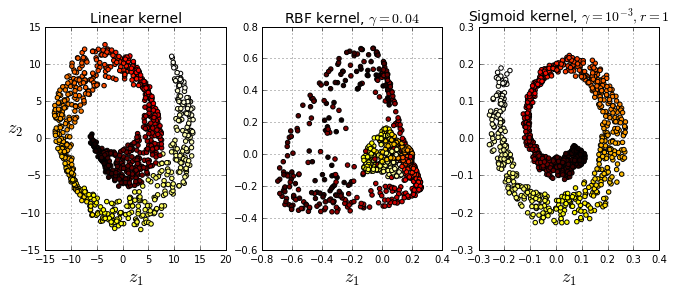

In [2]:
from sklearn.decomposition import KernelPCA
import numpy as np

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    
    X_reduced = pca.fit_transform(X)    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


## Selecting a Kernel and Tuning Parameters

The best way to select the optimal kernel and tuning parameters is evaluating the ultimate performance of the model that is going to use the reduced data. This is the best way to evaluate the performance, since there are no obvious metrics for unsupervised tasks such as dimensionality reduction. 

An example of selecting the appropiate kernel and tuning parameters is creating a pipeline with a kPCA transformation and a model. Then, the optimal parameters for the kPCA are determined using `GridSearchCV`.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

y = t > 6.9

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


A different approach to evaluating the parameters and the kernel used is to select the combination with the lowest reconstruction error. However, since the kernel trick is used, the reconstruction procedure is not straightforward. The kernel trick maps the original dataset into an infinite feature space that does not make possible to reconstruct the point in the original space, thus making impossible to calculate the reconstruction error. However, it is possible to find a point in the original space that maps nearby the reconstructed point. This point is called pre-image and is used to calculate the distance to the original point. 

The implementation of this reconstruction procedure in Scikit-Learn is training a regression model with the projected instances as the training set and the original instances as the target. The idea is to obtimize the MSE between the original training set and its pre-image.

In [8]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
 
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766139

# LLE

The Locally Linear Embedding technique is a Manifold Learning technique that does not rely on projections. The idea of LLE is to measure how each training instance linearly relates to its closest neighbors. After determining this relation, a low-dimensional representation that best preserves the local relationships is chosen. 

The first step of LLE is identifying the first $k$ nearest neighbors from instance $\mathbf{x}^{(i)}$ and then reconstructing $\mathbf{x}^{(i)}$ as a function of the neighbors. This function is $\sum_{j=1}^{m}w_{i,j}\mathbf{x}^{(i)}$ such that the distance between the function and $\mathbf{x}^{(i)}$ is as small as possible. The weights for the neighbors are normalized to one, and the weights for non-neighbors are set to zero. All $w_{i,j}$ are then stored in the weight matrix $\mathbf{\hat{W}}$.

The next step in LLE is to reduce the dimensionlity from $n$ to $d$ dimensions preserving the local relationships as much as possible. If $\mathbf{z}^{(i)}$ is the image of $\mathbf{x}^{(i)}$, the idea is to have the distance between $\mathbf{x}^{(i)}$ and $\sum_{j=1}^{m}w_{i,j}\mathbf{z}^{(i)}$ as small as possible. The problem looks similar to the first step, but this time the weights are kept fixed while the images are the one that are changed to achieve the smallest possible distance. The set of optimal $\mathbf{z}^{(i)}$ is then stored in the $\mathbf{\hat{Z}} matrix. 

It has to be taken into account that the Scikit-Learn algorithm has an $O(dm^{2})$ complexity for constructing the low-dimensional representation. This complexity makes the algorithm to scale poorly to very large datasets.

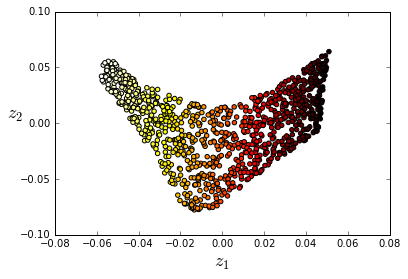

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)

# Other Dimensionality Reduction Techniques

+ *Multidiensional Scaling*: reduces dimensionality while preserving the distance between instances.
+ *Isomap*: Tries to preserve the geodesic distances between instances when reducing dimensionality
+ *t-Distributed Stochastic Neighbor Embedding (t-SNE)*: reduces dimensionality while trying to keep dissimilar instance apart and similar instances close. It is useful to visualize clusters of instances in high dimensional spaces.
+ *Linear Discriminant Analysis*: It is a classification algorithm that learns the most discriminative axes between the classes during training. These axes can be used to determine the space onto which the projection is going to be made. The advantage of this algorithm is that the projection keeps classes as far as possible, so it is a good technique to reduce dimensionality before using another classifier algorithm. 